### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols|

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled_resampled
* g) Imbalanced: X_train_resampled

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

# 4) Dimensionality reduction
from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)

# 5) Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans # spherical dataset (n_cluster by (elbow / silhouette_score / silhoutette_samples)) 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN # eps by K-distanceGraph
from sklearn.neighbors import NearestNeighbors # determine nearest neighbor
# from sklearn.cluster import HDBSCAN # state of art
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples

# 6) Anomaly Detection
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# 7) Time Series Models
# Naive using df.diff(s)
from statsmodels.tsa.arima.model import ARIMA # Statstical Models as ARIMA and VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR # Handle Seasonality and Trends
from xgboost import XGBRegressor, XGBClassifier # Machine Learning Model: extract lag features
from prophet import Prophet # fb prophet: trending model for forcasting
# from pandas.tseries.holiday import USFederalHolidayCalendar as Calender
# cal = Calender() # all holidays
# holidays = cal.holidays(start=df.index.min(), end=df.index.max(), return_name=True)
# holidays_df = pd.DataFrame(data=holidays, columns=['holiday']).reset_index().rename(columns={"index":'ds'})
# holidays_df
# holidays_df.groupby('holiday')[['ds']].count()

# Deep Learning: Strongest
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### Will experiment:
* Statstical Models
* fb prophit
* ML models
* DL models
---

### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols|

In [2]:
# a) Understand Columns
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")
df
# daily measurement for:
# meantemp: in celisus
# humidity: grams of water vapor per cubic meter volume of air
# wind_speed: kmph
# meanpressure: atm

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
# b) check dtype -> df[col].astype()
df.info()
# date -> date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
# date -> date
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [5]:
# c) Describe Numerical Cols
# d) Describe Categorical Cols
df.describe()
# all are normal values except for humidity max_value is 100
# mean_pressure values is not so accurate also

,date,meantemp,humidity,wind_speed,meanpressure
count,1462,1462.000000,1462.000000,1462.000000,1462.000000
mean,2015-01-01 12:00:00,25.495521,60.771702,6.802209,1011.104548
min,2013-01-01 00:00:00,6.000000,13.428571,0.000000,-3.041667
25%,2014-01-01 06:00:00,18.857143,50.375000,3.475000,1001.580357
50%,2015-01-01 12:00:00,27.714286,62.625000,6.221667,1008.563492
75%,2016-01-01 18:00:00,31.305804,72.218750,9.238235,1014.944901
max,2017-01-01 00:00:00,38.714286,100.000000,42.220000,7679.333333
std,NaN,7.348103,16.769652,4.561602,180.231668


### 2) EDA (uni - bi(heatmap) - multi) -> Insights:

In [6]:
# seasonality
# year seasonality
px.scatter(x=df['date'], y=df['meantemp'])

In [7]:
# no monthly seasonality
month_filter = (df['date'] >= '2015-01-01') & (df['date'] <= '2016-01-01')
px.scatter(x=df['date'][month_filter], y=df['meantemp'][month_filter])

In [8]:
# no weekly seasonality
weekly_filter = (df['date'] >= '2015-01-01') & (df['date'] <= '2015-12-01')
px.scatter(x=df['date'][weekly_filter], y=df['meantemp'][weekly_filter])

In [9]:
# no daily seasonality
daily_filter = (df['date'] >= '2015-01-01') & (df['date'] <= '2015-01-08')
px.scatter(x=df['date'][daily_filter], y=df['meantemp'][daily_filter])

In [10]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


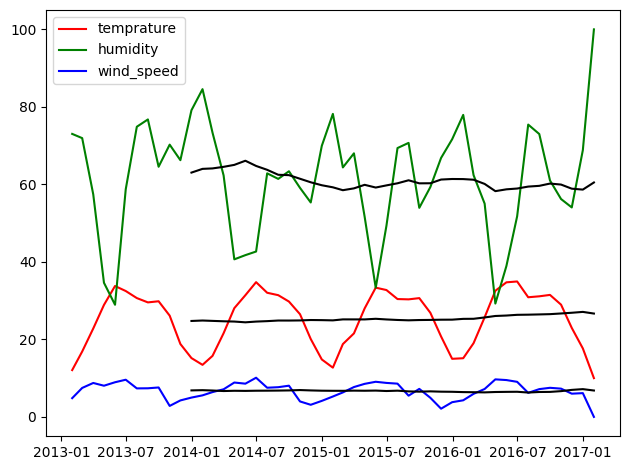

In [11]:
df_monthly = df.set_index("date").resample("M").mean()
trend = df_monthly.rolling(window=12).mean()

plt.plot(df_monthly.index, df_monthly['meantemp'], c='red', label='temprature')
plt.plot(trend.index, trend['meantemp'], c='black')
plt.plot(df_monthly.index, df_monthly['humidity'], c='green', label='humidity')
plt.plot(trend.index, trend['humidity'], c='black')
plt.plot(df_monthly.index, df_monthly['wind_speed'], c='blue', label='wind_speed')
plt.plot(trend.index, trend['wind_speed'], c='black')
plt.legend()
plt.tight_layout()
plt.show()

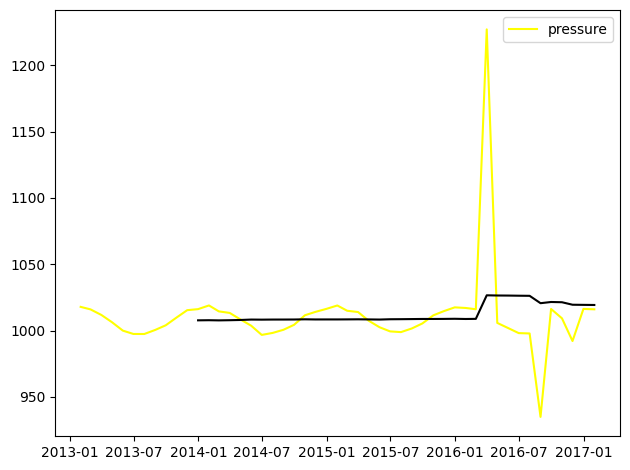

In [12]:
plt.plot(df_monthly.index, df_monthly['meanpressure'], c='yellow', label='pressure')
plt.plot(trend.index, trend['meanpressure'], c='black')
plt.legend()
plt.tight_layout()
plt.show()

**Comments:**
* No Trends at all it's stationery timeseries for all variables
* As we can see there {temprature, wind_speed, humidity} have year seasonality
* Also pressure have year seasonality except for last year 2016!!

**so I will use temprature, windspeed, humidity not pressure**

In [13]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [14]:
all_df = df.drop("meanpressure", axis=1)
all_df

,date,meantemp,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_scaled_resampled
* g) Imbalanced: X_train_resampled

In [15]:
# sort indicies
all_df.sort_values(by='date', ascending=True, inplace=True)
all_df

,date,meantemp,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


In [16]:
# a) Detect & Handle Duplicates
all_df.duplicated().sum()

0

In [17]:
# b) train_test_split

# train / test (last 6 months [12.5% of all_df])
train_df = all_df[all_df['date'] < '2016-06-01']
test_df = all_df[all_df['date'] >= '2016-06-01']
train_df.shape, test_df.shape

((1247, 4), (215, 4))

In [18]:
# c) Detect & Handle NaNs

train_df.isna().sum()

date          0
meantemp      0
humidity      0
wind_speed    0
dtype: int64

In [19]:
test_df.isna().sum()

date          0
meantemp      0
humidity      0
wind_speed    0
dtype: int64

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TimeSeriesImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='ffill', window=None):
        """
        Initialize the imputer.
        Parameters:
        - method: 'ffill', 'bfill', 'linear', or 'rolling' (default: 'ffill').
        - window: int, optional. Window size for rolling average (required for 'rolling' method).
        """
        self.method = method
        self.window = window
        self.fitted_values_ = None  # To store train values for rolling average
    
    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        if self.method == 'rolling' and self.window is not None:
            # Store rolling average (forward-looking only) from training data
            self.fitted_values_ = X_df.fillna(
                X_df.rolling(window=self.window, min_periods=1).mean()
            )
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X)
        
        if self.method in ['ffill', 'bfill']:
            return X_df.fillna(method=self.method).values
        elif self.method == 'linear':
            return X_df.interpolate(method='linear').values
        elif self.method == 'rolling':
            if self.window is None:
                raise ValueError("Window size must be specified for 'rolling' method.")
            if self.fitted_values_ is None:
                raise ValueError("The imputer must be fitted before transforming.")
            
            # Apply rolling average using fitted values as past context
            rolling_avg = self.fitted_values_.iloc[-self.window + 1 :]
            combined = pd.concat([rolling_avg, X_df])
            imputed = combined.fillna(
                combined.rolling(window=self.window, min_periods=1).mean()
            )
            return imputed.iloc[-len(X_df) :].values
        else:
            raise ValueError("Invalid method. Use 'ffill', 'bfill', 'linear', or 'rolling'.")

imputer = TimeSeriesImputer(method='rolling', window=3)
imputer

TimeSeriesImputer(method='rolling', window=3)

In [21]:
# d) Detect & Handle Outliers
# all values from plots are within normal range [no outliers]
# from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(n_estimators=1000, max_samples=1.0, max_features=1.0, contamination='auto')
# y_preds = isolation_forest.fit_predict(df[['AEP_MW']])
# np.unique(y_preds) # 1:in-lier, -1:out-lier

# df['isolation_forest'] = y_preds
# df['isolation_forest'].value_counts()
# df_cleaned = df[df['isolation_forest'] == 1].copy()

In [22]:
# e) Encoding: no encoding needed

In [23]:
# f) Scaling: will scale at modeling part also

### 4) Modeling:

* 0) Naive Forecasting [Baseline model]

* 1) Statstical Models [Baseline model]

* 2) Facebook Prophet Model

* 3) Machine Leanring Models

* 4) Deep Learning LSTM Model 

* 5) Try Dart for multiple time series outputs and ensemble methods

#### 0) Naive Forecasting:

In [24]:
# 0) Naive Forecasting: for temprature
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)
train_df

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000
...,...,...,...
2016-05-27,38.272727,26.090909,15.318182
2016-05-28,36.062500,37.250000,14.405556
2016-05-29,31.500000,57.062500,11.681250


In [25]:
# diffrencing yearly
all_dff = all_df.set_index('date')
diff_365 = all_dff['meantemp'].diff(365)['2016-06-01':]
target = all_dff['meantemp']['2016-06-01':]
print(f"Test Yearly MAE: {(diff_365).abs().mean()}")
print(f"Test Yearly MAPE: {(diff_365 / target).abs().mean() * 100}")

Test Yearly MAE: 2.4591553843018445
Test Yearly MAPE: 9.3345260223891


In [26]:
# diffrencing daily
all_dff = all_df.set_index('date')
diff_1 = all_dff['meantemp'].diff(1)['2016-06-01':]
target = all_dff['meantemp']['2016-06-01':]
print(f"Test Daily MAE: {(diff_1).abs().mean()}")
print(f"Test Daily MAPE: {(diff_1 / target).abs().mean() * 100}")

Test Daily MAE: 1.2047923352941772
Test Daily MAPE: 4.702241559737371


#### 1) Statstical Models

In [27]:
exogoruse_features = train_df[['humidity', 'wind_speed']]
arima_model = SARIMAX(train_df['meantemp'], exog=exogoruse_features,
      order=(1, 1, 1), # p=1 last day influence today and q=1, d=1 for removing this slightly trend
                     )
arima_model = arima_model.fit()
arima_model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [28]:
y_test_pred = arima_model.predict(start=test_df.index[0], end=test_df.index[-1], exog=test_df[['humidity', 'wind_speed']])
print(f"Test MAE: {(test_df['meantemp'] - y_test_pred).abs().mean()}")
print(f"Test MAPE: {np.mean(np.abs((test_df['meantemp'].values - y_test_pred.values) / test_df['meantemp'].values)) * 100}")

Test MAE: 4.520322617860113
Test MAPE: 21.452605709829907


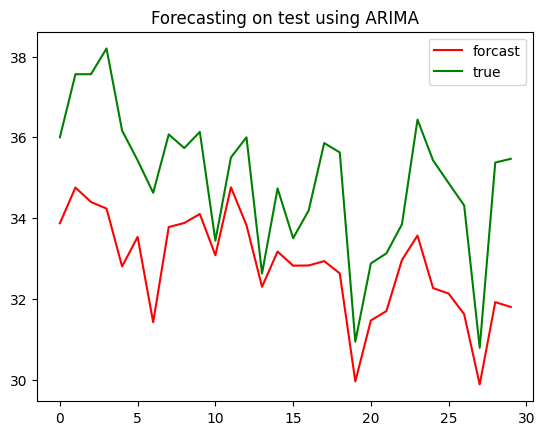

In [29]:
y_test_preds = y_test_pred.values[:30].flatten()
y_test_true = test_df['meantemp'].values[:30].flatten()
plt.plot(y_test_preds, c='red', label='forcast')
plt.plot(y_test_true, c='green', label='true')
plt.title("Forecasting on test using ARIMA")
plt.legend()
plt.show()

##### VAR

In [30]:
# VAR assumes stationery dataset so remove trend and seasonality [using diff_1 and diff_s]
dff = all_df.copy()
dff['diff_yearly_meantemp'] = dff['meantemp'].diff(365) # to remove seasonality
dff['diff_yearly_humidity'] = dff['humidity'].diff(365) # to remove seasonality
dff['diff_yearly_wind_speed'] = dff['wind_speed'].diff(365) # to remove seasonality
dff

,date,meantemp,humidity,wind_speed,diff_yearly_meantemp,diff_yearly_humidity,diff_yearly_wind_speed
0,2013-01-01,10.000000,84.500000,0.000000,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,NaN,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,NaN,NaN,NaN
4,2013-01-05,6.000000,86.833333,3.700000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,0.842391,3.043478,-3.864674
1458,2016-12-29,15.238095,87.857143,6.000000,-0.261905,16.107143,3.900000
1459,2016-12-30,14.095238,89.666667,6.266667,-0.904762,18.291667,4.179167
1460,2016-12-31,15.052632,87.000000,7.325000,0.338346,14.714286,6.267857


In [31]:
dff.dropna(inplace=True)
dff.shape

(1097, 7)

In [32]:
# var train on diffrencing then add to result value from 365 days
train_filter = (dff['date'] < '2016-06-01')
dff[train_filter].iloc[-(365+1):-(365-215+1)] 

,date,meantemp,humidity,wind_speed,diff_yearly_meantemp,diff_yearly_humidity,diff_yearly_wind_speed
881,2015-06-01,29.375000,41.750000,12.512500,-3.375000,7.500000,-3.687500
882,2015-06-02,31.625000,39.250000,8.575000,-1.125000,-2.125000,3.937500
883,2015-06-03,28.625000,50.500000,6.725000,-6.250000,16.875000,0.237500
884,2015-06-04,31.875000,48.375000,4.862500,-3.375000,15.250000,-2.325000
885,2015-06-05,32.625000,39.875000,6.012500,-4.250000,13.000000,-2.550000
...,...,...,...,...,...,...,...
1091,2015-12-28,17.125000,58.125000,10.887500,8.125000,-27.875000,10.187500
1092,2015-12-29,16.375000,65.000000,7.412500,5.250000,-7.625000,6.025000
1093,2015-12-30,15.500000,71.750000,2.100000,3.875000,1.125000,-0.450000
1094,2015-12-31,15.000000,71.375000,2.087500,2.625000,4.250000,-0.700000


Test MAE: 2.1670366801696064
Test MAPE: 8.320278461283548


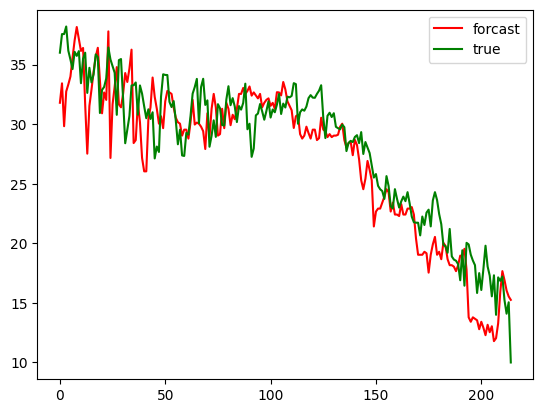

In [33]:
# VAR: expects multi-variate time series not only univariate

train_filter = (dff['date'] < '2016-06-01')
test_filter = (dff['date'] >= '2016-06-01')
var_model = VAR(dff[['diff_yearly_meantemp', 'diff_yearly_humidity', 'diff_yearly_wind_speed']][train_filter].reset_index(drop=True))
var_model = var_model.fit(maxlags=3) # max steps behind

# forecast
forcasting_next_day = var_model.forecast(y=dff[['diff_yearly_meantemp', 'diff_yearly_humidity', 'diff_yearly_wind_speed']][train_filter].reset_index(drop=True).values[-3:], steps = 215)


# MAE on Test
y_test_preds = (forcasting_next_day[:, 0] + dff[train_filter].iloc[-(365+1):-(365-215+1)]['meantemp']).values.flatten()
y_test_true = test_df['meantemp'].values.flatten()
print(f"Test MAE: {np.mean(np.abs(y_test_true - y_test_preds))}")

# MAPE on Test
print(f"Test MAPE: {np.mean(np.abs((y_test_true - y_test_preds) / y_test_true)) * 100}") # 2.3% away

plt.plot(y_test_preds, c='red', label='forcast')
plt.plot(y_test_true, c='green', label='true')
plt.legend()
plt.show()

In [34]:
# VAR for daily
dff = all_df.copy()
dff['diff_daily_meantemp'] = dff['meantemp'].diff(1) # to remove seasonality
dff['diff_daily_humidity'] = dff['humidity'].diff(1) # to remove seasonality
dff['diff_daily_wind_speed'] = dff['wind_speed'].diff(1) # to remove seasonality
dff.dropna(inplace=True)
dff

,date,meantemp,humidity,wind_speed,diff_daily_meantemp,diff_daily_humidity,diff_daily_wind_speed
1,2013-01-02,7.400000,92.000000,2.980000,-2.600000,7.500000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333,-0.233333,-5.000000,1.653333
3,2013-01-04,8.666667,71.333333,1.233333,1.500000,-15.666667,-3.400000
4,2013-01-05,6.000000,86.833333,3.700000,-2.666667,15.500000,2.466667
5,2013-01-06,7.000000,82.800000,1.480000,1.000000,-4.033333,-2.220000
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,0.367391,0.493478,-4.787174
1458,2016-12-29,15.238095,87.857143,6.000000,-1.979296,19.813665,2.452174
1459,2016-12-30,14.095238,89.666667,6.266667,-1.142857,1.809524,0.266667
1460,2016-12-31,15.052632,87.000000,7.325000,0.957393,-2.666667,1.058333


Test MAE: 1.2096883473083648
Test MAPE: 4.721803170141384


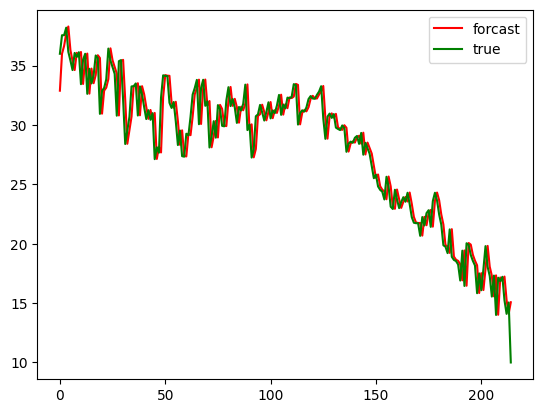

In [35]:
# VAR: expects multi-variate time series not only univariate

train_filter = (dff['date'] < '2016-06-01')
test_filter = (dff['date'] >= '2016-06-01')
var_model = VAR(dff[['diff_daily_meantemp', 'diff_daily_humidity', 'diff_daily_wind_speed']][train_filter].reset_index(drop=True))
var_model = var_model.fit(maxlags=3) # max steps behind

# forecast
forcasting_next_day = var_model.forecast(y=dff[['diff_daily_meantemp', 'diff_daily_humidity', 'diff_daily_wind_speed']][train_filter].reset_index(drop=True).values[-3:], steps = 215)


# MAE on Test
y_test_preds = forcasting_next_day[:, 0] + (dff[(dff['date'] >= '2016-05-31') & (dff['date'] < '2017-01-01')]['meantemp']).values.flatten()
y_test_true = test_df['meantemp'].values.flatten()
print(f"Test MAE: {np.mean(np.abs(y_test_true - y_test_preds))}")

# MAPE on Test
print(f"Test MAPE: {np.mean(np.abs((y_test_true - y_test_preds) / y_test_true)) * 100}") # 2.3% away

plt.plot(y_test_preds, c='red', label='forcast')
plt.plot(y_test_true, c='green', label='true')
plt.legend()
plt.show()

#### Baseline Accuracies:

* Naive Forecasting: Yearly (9.33% [2.45]), Naive aily: (4.7[1.2])
* Statstical SARIMA & VAR: Yearly (8.32% [2.16]), Daily (4.7% [1.209])

#### 2) Facebook Prophet Model

In [36]:
def create_dummy_var(df):
    dff_2 = df.copy()
    dff_2['day'] = dff_2['date'].dt.day
    dff_2['dayofweek'] = dff_2['date'].dt.dayofweek
    dff_2['quarter'] = dff_2['date'].dt.quarter
    dff_2['month'] = dff_2['date'].dt.month
    dff_2['year'] = dff_2['date'].dt.year
    dff_2.set_index('date', inplace=True)
    return dff_2

def create_lag_features_yearly(df, col):
    dff_2 = df.copy()
    # dff_2['lag_1year'] = dff_2['AEP_MW'].shift(365 * 24 * 1 - 2)
    # dff_2['lag_2year'] = dff_2['AEP_MW'].shift(365 * 24 * 2 - 2)
    # dff_2['lag_3year'] = dff_2['AEP_MW'].shift(365 * 24 * 3 - 2)
    target_map = dff_2[col].to_dict()
    dff_2[f'{col}_lag_1year'] = (dff_2.index - pd.Timedelta('364 days')).map(target_map)
    dff_2[f'{col}_lag_2year'] = (dff_2.index - pd.Timedelta('728 days')).map(target_map)
    return dff_2

def create_lag_features_daily(df, col):
    dff_2 = df.copy()
    target_map = dff_2[col].to_dict()
    dff_2[f'{col}_lag_1day'] = (dff_2.index - pd.Timedelta('1 days')).map(target_map)
    dff_2[f'{col}_lag_2day'] = (dff_2.index - pd.Timedelta('2 days')).map(target_map)
    dff_2[f'{col}_lag_3day'] = (dff_2.index - pd.Timedelta('3 days')).map(target_map)
    return dff_2

In [37]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [38]:
dff = create_dummy_var(df.drop("meanpressure", axis=1)).copy()
dff = create_lag_features_yearly(dff, 'meantemp')
dff = create_lag_features_yearly(dff, 'humidity')
dff = create_lag_features_yearly(dff, 'wind_speed')
dff.dropna(inplace=True)
dff

,meantemp,humidity,wind_speed,day,dayofweek,quarter,month,year,meantemp_lag_1year,meantemp_lag_2year,humidity_lag_1year,humidity_lag_2year,wind_speed_lag_1year,wind_speed_lag_2year
date,,,,,,,,,,,,,,
2014-12-30,11.625000,70.625000,2.550000,30,1,4,12,2014,14.500000,10.000000,89.375000,84.500000,4.862500,0.000000
2014-12-31,12.375000,67.125000,2.787500,31,2,4,12,2014,13.375000,7.400000,89.625000,92.000000,7.650000,2.980000
2015-01-01,14.750000,72.000000,0.925000,1,3,1,1,2015,11.000000,7.166667,78.375000,87.000000,8.100000,4.633333
2015-01-02,14.875000,96.625000,3.012500,2,4,1,1,2015,12.500000,8.666667,74.875000,71.333333,5.325000,1.233333
2015-01-03,15.125000,92.000000,0.925000,3,5,1,1,2015,12.875000,6.000000,88.125000,86.833333,1.162500,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,28,2,4,12,2016,15.500000,12.375000,71.750000,67.125000,2.100000,2.787500
2016-12-29,15.238095,87.857143,6.000000,29,3,4,12,2016,15.000000,14.750000,71.375000,72.000000,2.087500,0.925000
2016-12-30,14.095238,89.666667,6.266667,30,4,4,12,2016,14.714286,14.875000,72.285714,96.625000,1.057143,3.012500


In [39]:
# train / test split
train_df = dff[:'2016-05-31']
test_df = dff['2016-06-01':]
train_df

,meantemp,humidity,wind_speed,day,dayofweek,quarter,month,year,meantemp_lag_1year,meantemp_lag_2year,humidity_lag_1year,humidity_lag_2year,wind_speed_lag_1year,wind_speed_lag_2year
date,,,,,,,,,,,,,,
2014-12-30,11.625000,70.625000,2.550000,30,1,4,12,2014,14.500,10.000000,89.375,84.500000,4.8625,0.000000
2014-12-31,12.375000,67.125000,2.787500,31,2,4,12,2014,13.375,7.400000,89.625,92.000000,7.6500,2.980000
2015-01-01,14.750000,72.000000,0.925000,1,3,1,1,2015,11.000,7.166667,78.375,87.000000,8.1000,4.633333
2015-01-02,14.875000,96.625000,3.012500,2,4,1,1,2015,12.500,8.666667,74.875,71.333333,5.3250,1.233333
2015-01-03,15.125000,92.000000,0.925000,3,5,1,1,2015,12.875,6.000000,88.125,86.833333,1.1625,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,38.272727,26.090909,15.318182,27,4,2,5,2016,35.125,33.125000,27.250,44.500000,8.1250,11.587500
2016-05-28,36.062500,37.250000,14.405556,28,5,2,5,2016,32.250,34.625000,38.750,39.000000,12.2625,6.487500
2016-05-29,31.500000,57.062500,11.681250,29,6,2,5,2016,34.250,32.750000,25.000,34.250000,14.5875,16.200000


In [40]:
from prophet.diagnostics import cross_validation
from pandas.tseries.holiday import USFederalHolidayCalendar as Calender

cal = Calender() # all holidays
holidays = cal.holidays(start=df.index.min(), end=df.index.max(), return_name=True)
holidays_df = pd.DataFrame(data=holidays, columns=['holiday']).reset_index().rename(columns={"index":'ds'})

fb_model = Prophet(holidays=holidays_df, growth="linear", yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False) 
fb_model

In [41]:
train_df = train_df.reset_index().rename(columns={"date":'ds', 'meantemp':'y'})
test_df = test_df.reset_index().rename(columns={"date":'ds', 'meantemp':'y'})

fb_model.add_regressor("day")
fb_model.add_regressor("dayofweek")
fb_model.add_regressor("quarter")
fb_model.add_regressor("month")
fb_model.add_regressor("year")
fb_model.add_regressor("meantemp_lag_1year")
fb_model.add_regressor("meantemp_lag_2year")
fb_model.add_regressor("humidity_lag_1year")
fb_model.add_regressor("humidity_lag_2year")
fb_model.add_regressor("wind_speed_lag_1year")
fb_model.add_regressor("wind_speed_lag_2year")

fb_model.fit(train_df)

05:21:07 - cmdstanpy - INFO - Chain [1] start processing
05:21:07 - cmdstanpy - INFO - Chain [1] done processing


Train mae: 1.4907268830129234
Train mape: 6.596385825758544


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



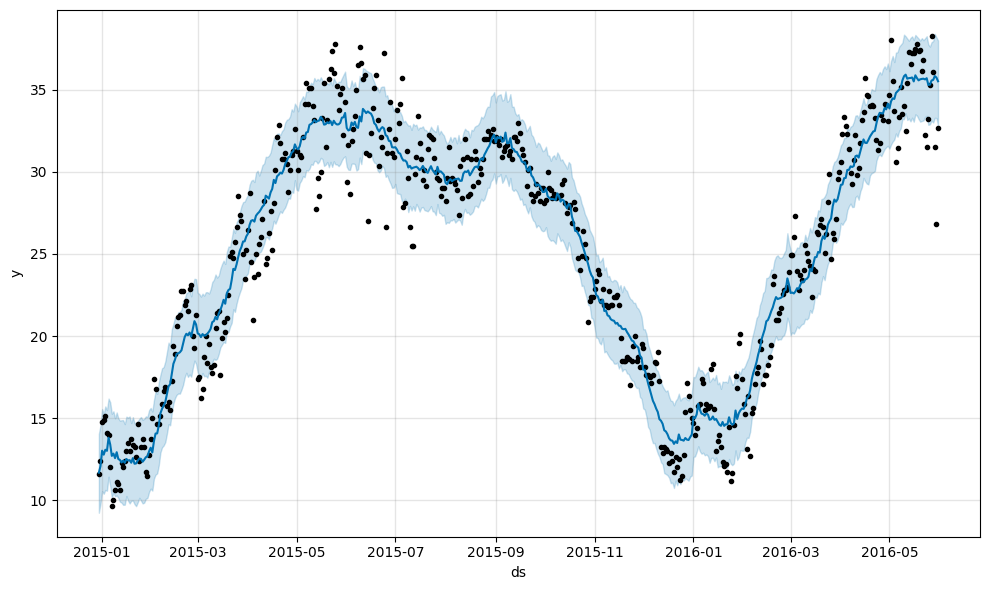

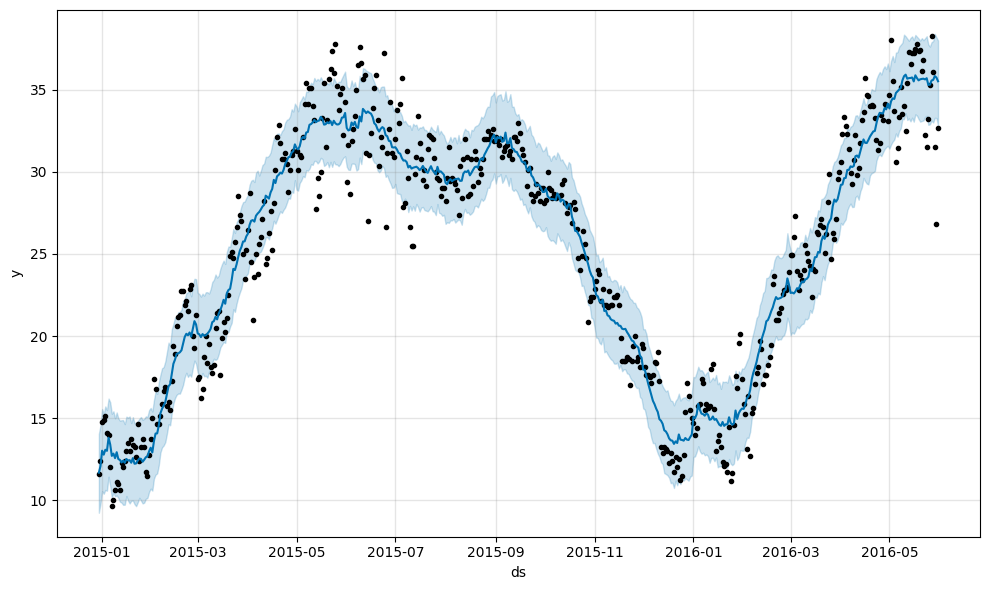

In [42]:
result_train_df = fb_model.predict(train_df)
mae = (train_df['y'] - result_train_df['yhat']).abs().mean()
mape = np.mean(np.abs((train_df['y'] - result_train_df['yhat']) / train_df['y'])) * 100
print(f"Train mae: {mae}")
print(f"Train mape: {mape}")
fb_model.plot(result_train_df)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavio

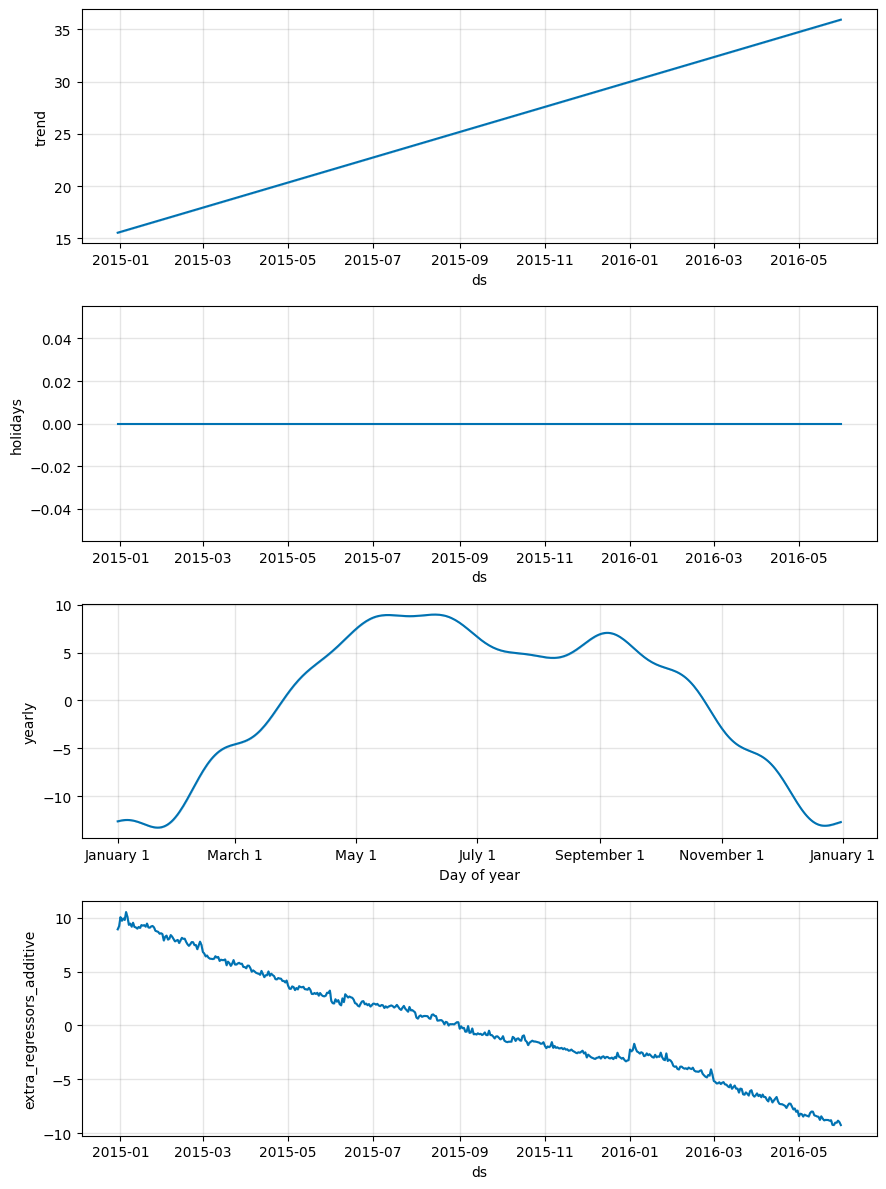

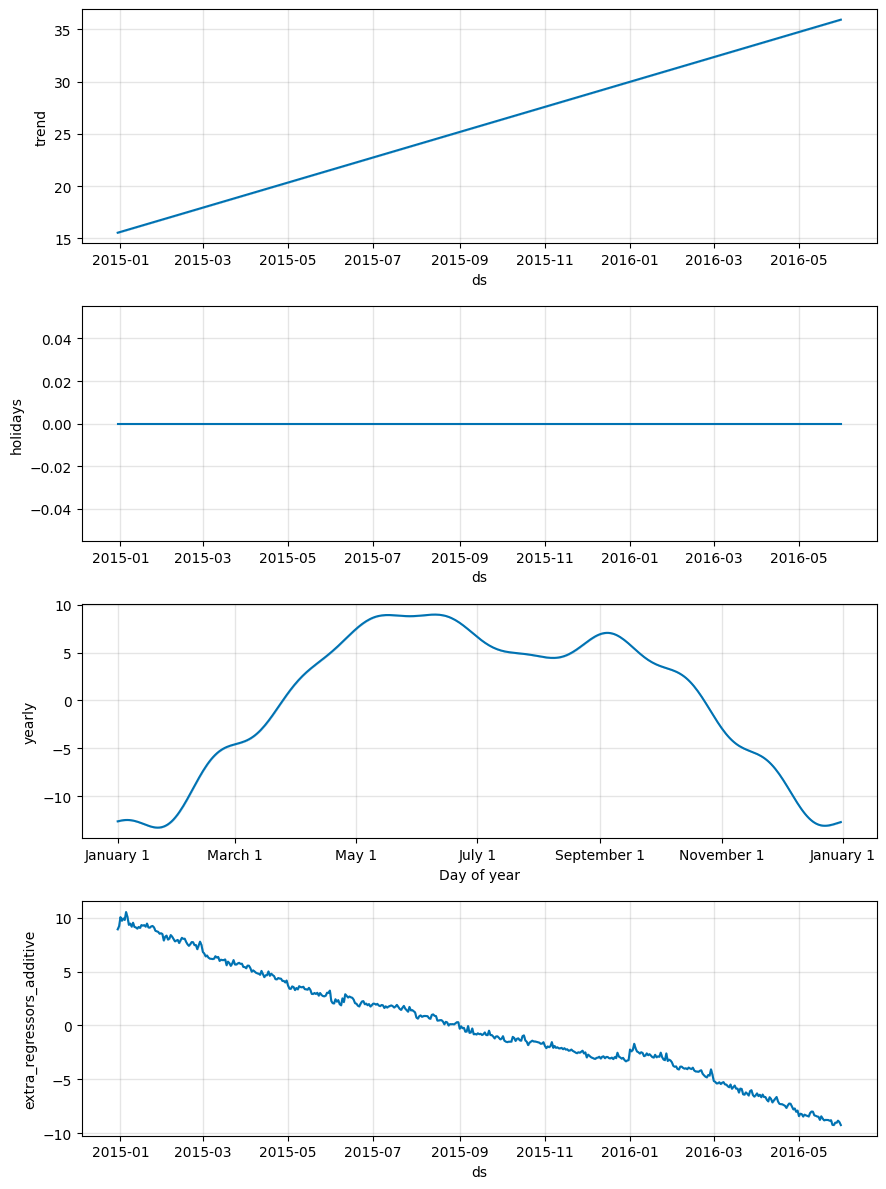

In [43]:
fb_model.plot_components(result_train_df)

In [44]:
df_cv = cross_validation(
    fb_model, 
    initial='200 days',  # Train on the first 7.5 years and test it for the next period
    period='90 days',   # Retrain every 6 months
    horizon='180 days'   # Forecast 1 year ahead
)

mae = (df_cv['y'] - df_cv['yhat']).abs().mean()
mape = np.mean(np.abs((df_cv['y'] - df_cv['yhat']) / df_cv['y'])) * 100
print(f"Validation MAE {mae}")
print(f"Validation MAPE {mape}")

  0%|          | 0/2 [00:00<?, ?it/s]

05:21:09 - cmdstanpy - INFO - Chain [1] start processing
05:21:09 - cmdstanpy - INFO - Chain [1] done processing
05:21:09 - cmdstanpy - INFO - Chain [1] start processing
05:21:09 - cmdstanpy - INFO - Chain [1] done processing


Validation MAE 14.591742045699682
Validation MAPE 73.9374384557752


Test mae: 1.5718147434278695
Test mape: 5.968590674350697


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



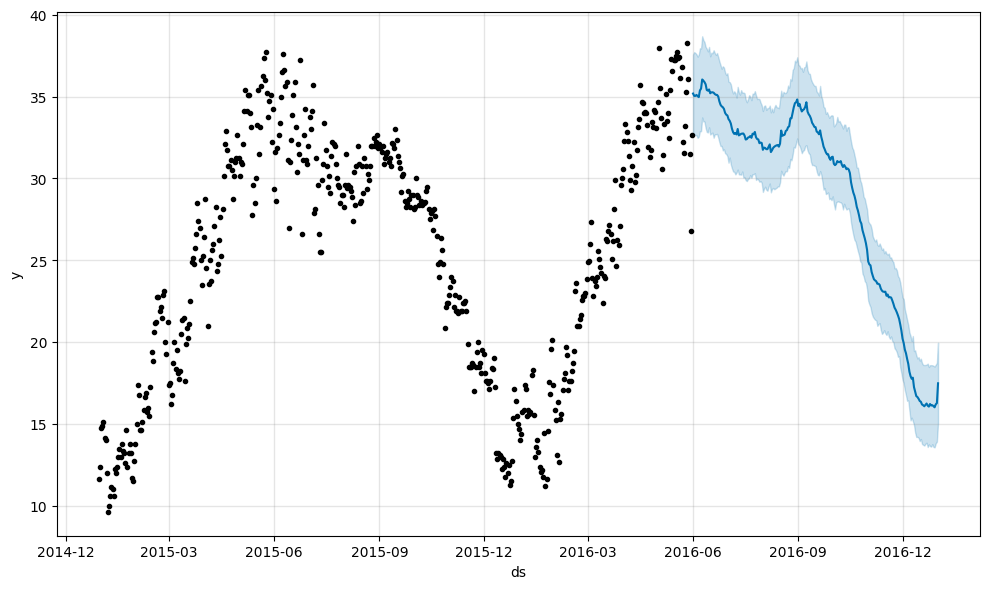

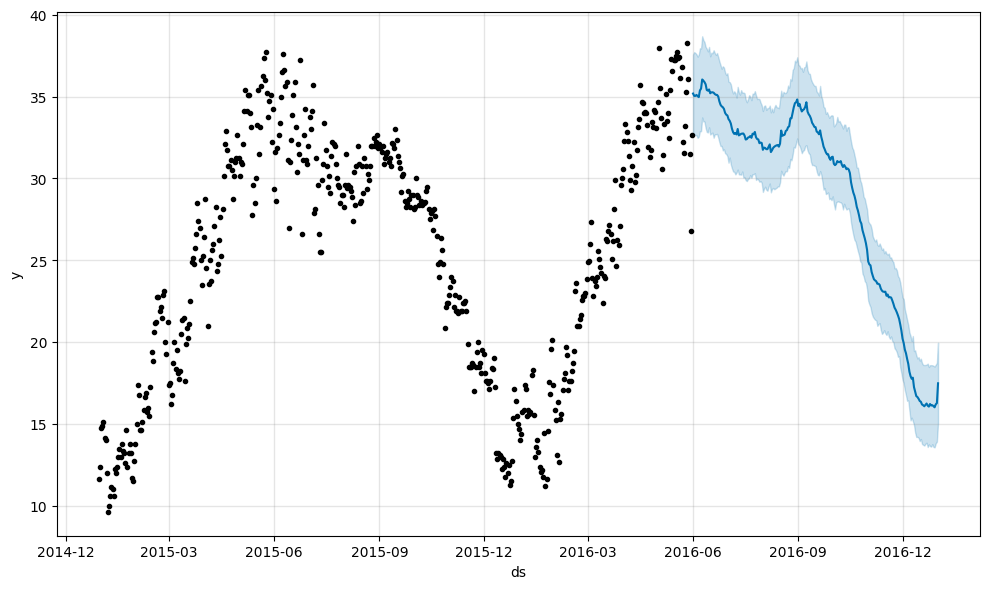

In [45]:
test_df.dropna(inplace=True)
result_test_df = fb_model.predict(test_df)
mae = (test_df['y'] - result_test_df['yhat']).abs().mean()
mape = np.mean(np.abs((test_df['y'] - result_test_df['yhat']) / test_df['y'])) * 100
print(f"Test mae: {mae}")
print(f"Test mape: {mape}")
fb_model.plot(result_test_df)

#### fb_prophit on daily

05:21:10 - cmdstanpy - INFO - Chain [1] start processing
05:21:10 - cmdstanpy - INFO - Chain [1] done processing


Train mae: 1.138437799133938
Train mape: 5.036278409839932


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



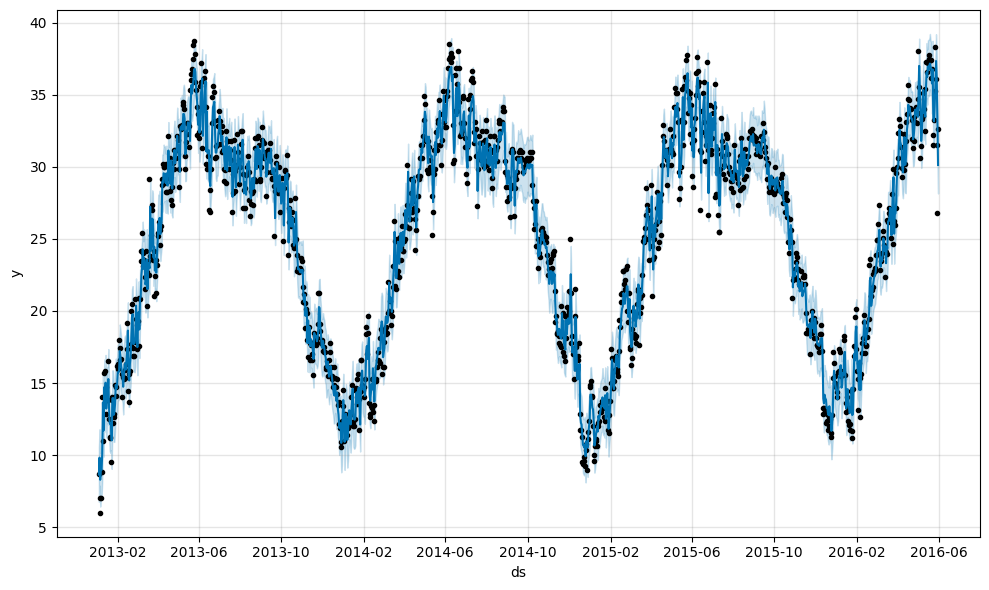

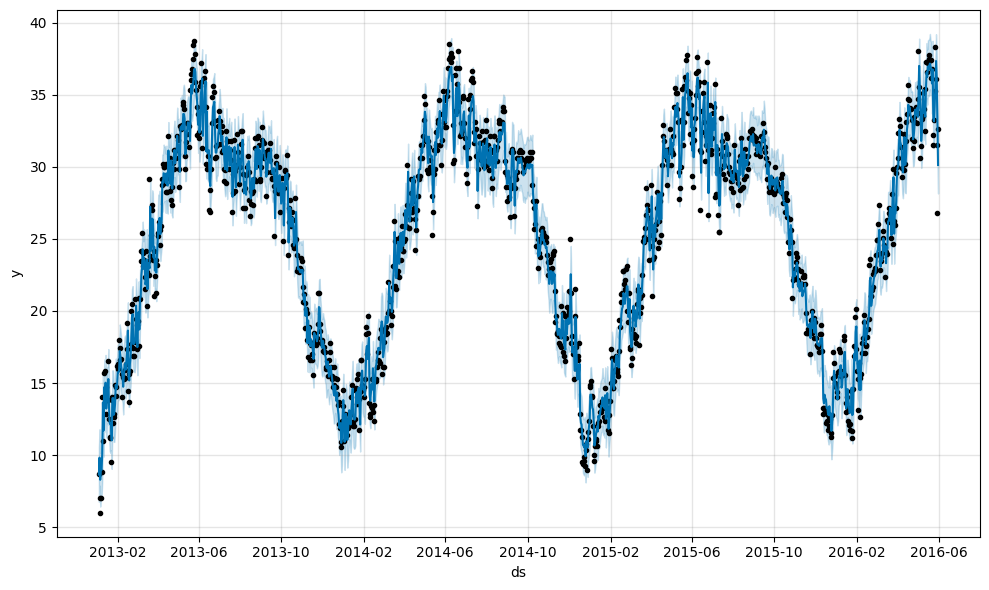

In [46]:
from prophet.diagnostics import cross_validation
from pandas.tseries.holiday import USFederalHolidayCalendar as Calender


dff = create_dummy_var(df.drop("meanpressure", axis=1)).copy()
dff = create_lag_features_daily(dff, 'meantemp')
dff = create_lag_features_daily(dff, 'humidity')
dff = create_lag_features_daily(dff, 'wind_speed')
dff.dropna(inplace=True)

# train / test split
train_df = dff[:'2016-05-31']
test_df = dff['2016-06-01':]

cal = Calender() # all holidays
holidays = cal.holidays(start=df.index.min(), end=df.index.max(), return_name=True)
holidays_df = pd.DataFrame(data=holidays, columns=['holiday']).reset_index().rename(columns={"index":'ds'})

fb_model = Prophet(holidays=holidays_df, growth="linear", yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False) 

train_df = train_df.reset_index().rename(columns={"date":'ds', 'meantemp':'y'})
test_df = test_df.reset_index().rename(columns={"date":'ds', 'meantemp':'y'})

fb_model.add_regressor("day")
fb_model.add_regressor("dayofweek")
fb_model.add_regressor("quarter")
fb_model.add_regressor("month")
fb_model.add_regressor("year")
fb_model.add_regressor("meantemp_lag_1day")
fb_model.add_regressor("meantemp_lag_2day")
fb_model.add_regressor("meantemp_lag_3day")
fb_model.add_regressor("humidity_lag_1day")
fb_model.add_regressor("humidity_lag_2day")
fb_model.add_regressor("humidity_lag_3day")
fb_model.add_regressor("wind_speed_lag_1day")
fb_model.add_regressor("wind_speed_lag_2day")
fb_model.add_regressor("wind_speed_lag_3day")

fb_model.fit(train_df)
result_train_df = fb_model.predict(train_df)
mae = (train_df['y'] - result_train_df['yhat']).abs().mean()
mape = np.mean(np.abs((train_df['y'] - result_train_df['yhat']) / train_df['y'])) * 100
print(f"Train mae: {mae}")
print(f"Train mape: {mape}")
fb_model.plot(result_train_df)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavio

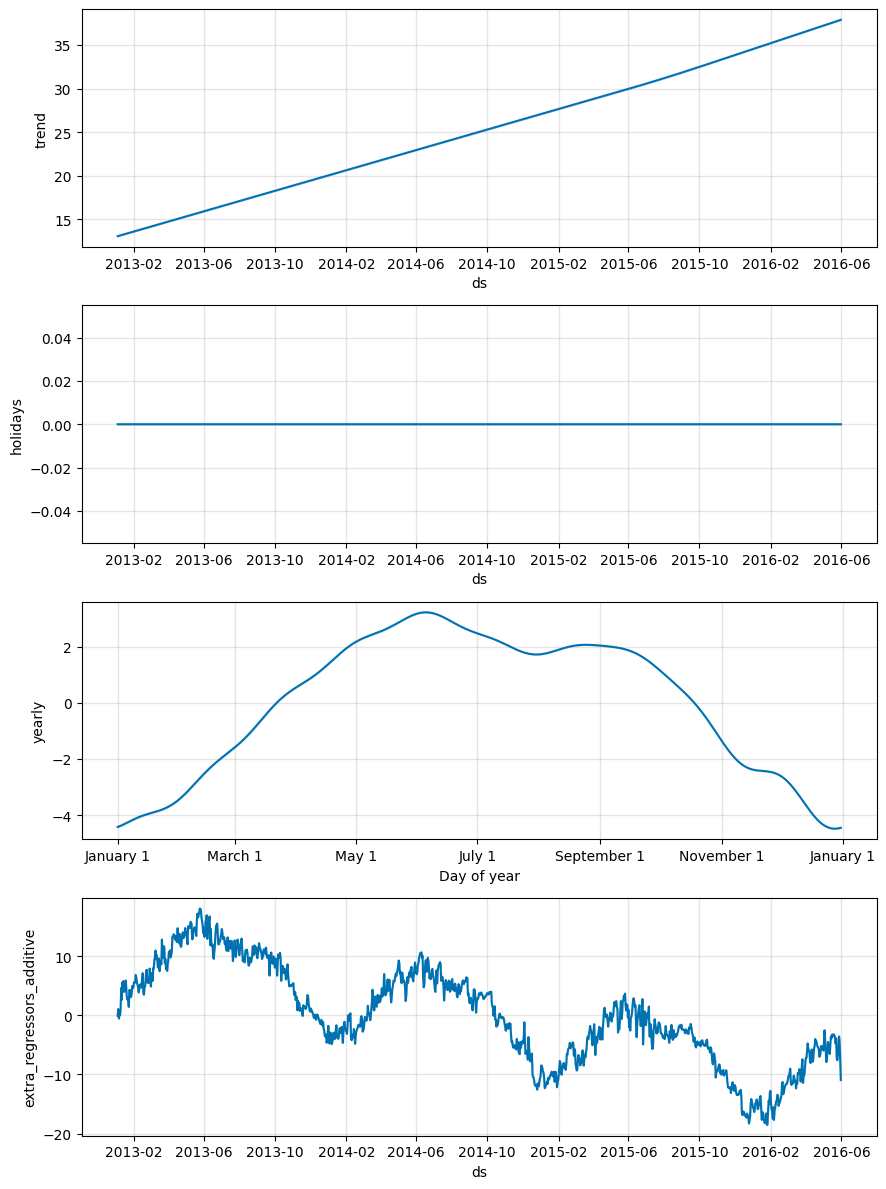

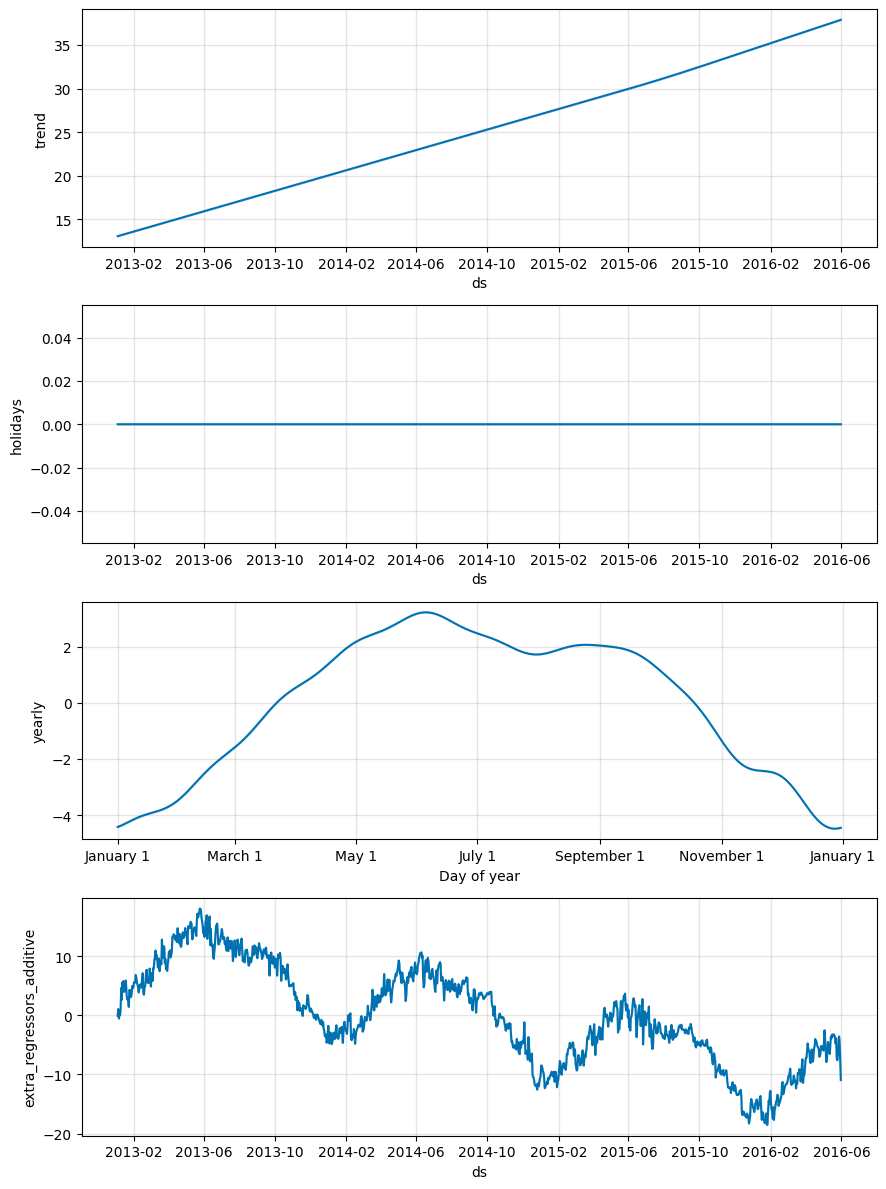

In [47]:
fb_model.plot_components(result_train_df)

Test mae: 1.1693183322061251
Test mape: 4.625445384217892


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



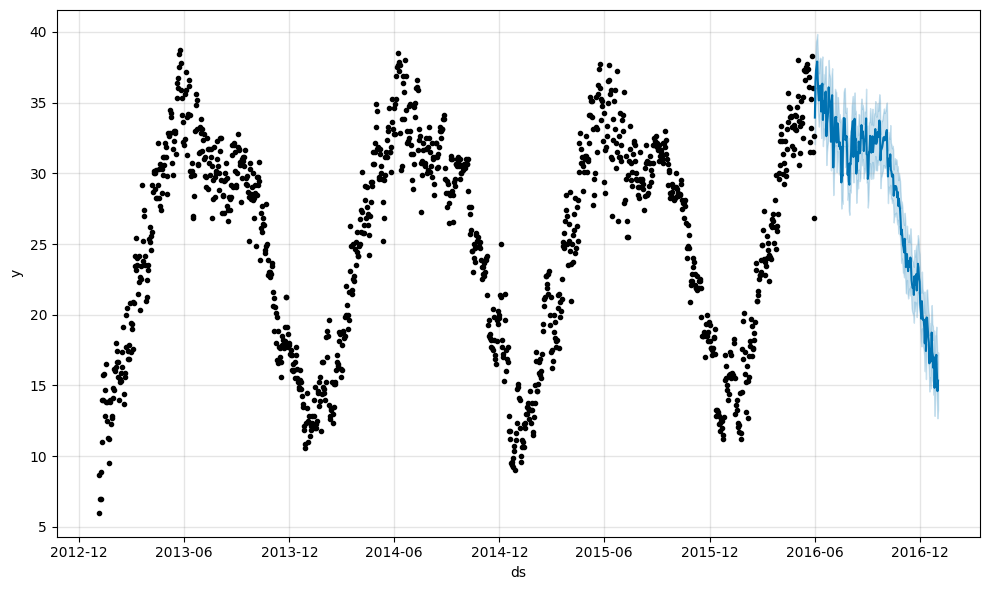

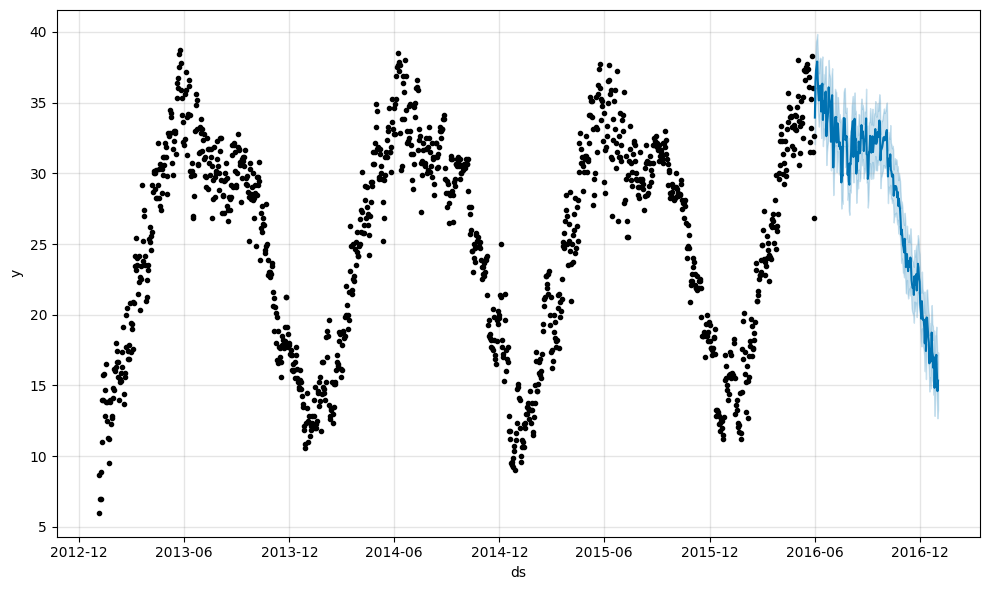

In [48]:
test_df.dropna(inplace=True)
result_test_df = fb_model.predict(test_df)
mae = (test_df['y'] - result_test_df['yhat']).abs().mean()
mape = np.mean(np.abs((test_df['y'] - result_test_df['yhat']) / test_df['y'])) * 100
print(f"Test mae: {mae}")
print(f"Test mape: {mape}")
fb_model.plot(result_test_df)

#### 3) Machine Leanring Models

In [49]:
dff = create_dummy_var(df.drop("meanpressure", axis=1)).copy()
dff = create_lag_features_yearly(dff, 'meantemp')
dff = create_lag_features_yearly(dff, 'humidity')
dff = create_lag_features_yearly(dff, 'wind_speed')
dff.dropna(inplace=True)

# train / test split
train_df = dff[:'2016-05-31']
test_df = dff['2016-06-01':]

train_df.dropna(inplace=True)
X_train = train_df.drop('meantemp', axis=1)
y_train = train_df["meantemp"]

X_test = test_df.drop('meantemp', axis=1)
y_test = test_df["meantemp"]
X_train

<ipython-input-49-6edc36dc75b6>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,humidity,wind_speed,day,dayofweek,quarter,month,year,meantemp_lag_1year,meantemp_lag_2year,humidity_lag_1year,humidity_lag_2year,wind_speed_lag_1year,wind_speed_lag_2year
date,,,,,,,,,,,,,
2014-12-30,70.625000,2.550000,30,1,4,12,2014,14.500,10.000000,89.375,84.500000,4.8625,0.000000
2014-12-31,67.125000,2.787500,31,2,4,12,2014,13.375,7.400000,89.625,92.000000,7.6500,2.980000
2015-01-01,72.000000,0.925000,1,3,1,1,2015,11.000,7.166667,78.375,87.000000,8.1000,4.633333
2015-01-02,96.625000,3.012500,2,4,1,1,2015,12.500,8.666667,74.875,71.333333,5.3250,1.233333
2015-01-03,92.000000,0.925000,3,5,1,1,2015,12.875,6.000000,88.125,86.833333,1.1625,3.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27,26.090909,15.318182,27,4,2,5,2016,35.125,33.125000,27.250,44.500000,8.1250,11.587500
2016-05-28,37.250000,14.405556,28,5,2,5,2016,32.250,34.625000,38.750,39.000000,12.2625,6.487500
2016-05-29,57.062500,11.681250,29,6,2,5,2016,34.250,32.750000,25.000,34.250000,14.5875,16.200000


In [50]:
# simple model
xgb_model = XGBRegressor(n_estimators=1000, random_state=42, early_stopping_rounds=50, learning_rate=0.01)
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [51]:
# see its performance
from sklearn.model_selection import TimeSeriesSplit

train_mae_list = []
valid_mae_list = []

tss = TimeSeriesSplit(n_splits=5, test_size=90, gap=1)
for train_idx, valid_idx in tss.split(train_df):
    # Split data into training and validation sets
    X_train_cross_val = train_df.iloc[train_idx].drop('meantemp', axis=1).reset_index(drop=True)
    y_train_cross_val = train_df.iloc[train_idx]['meantemp'].values
    X_val_cross_val = train_df.iloc[valid_idx].drop('meantemp', axis=1).reset_index(drop=True)
    y_val_cross_val = train_df.iloc[valid_idx]['meantemp'].values 
    
    # Define and fit the XGBoost model
    xgb_model = XGBRegressor(
        n_estimators=2000,
        random_state=42,
        early_stopping_rounds=20,
        learning_rate=0.01,
        eval_metric='mae'  # Specify the evaluation metric
    )
    
    xgb_model.fit(
        X_train_cross_val, 
        y_train_cross_val, 
        eval_set=[(X_train_cross_val, y_train_cross_val), (X_val_cross_val, y_val_cross_val)],  # Validation data
        verbose=100
    )

    # Make predictions for training and validation sets
    y_train_pred = xgb_model.predict(X_train_cross_val)
    y_val_pred = xgb_model.predict(X_val_cross_val)
    
    # Compute MAE for training and validation sets
    train_mae = mean_absolute_error(y_train_cross_val, y_train_pred)
    valid_mae = mean_absolute_error(y_val_cross_val, y_val_pred)
    
    # Store the MAE values
    train_mae_list.append(train_mae)
    valid_mae_list.append(valid_mae)

# Calculate the average MAE across all folds
avg_train_mae = np.mean(train_mae_list)
avg_valid_mae = np.mean(valid_mae_list)

# Print the average MAE
print(f"Average Training MAE: {avg_train_mae}")
print(f"Average Validation MAE: {avg_valid_mae}")

[0]	validation_0-mae:3.04962	validation_1-mae:12.96677
[100]	validation_0-mae:1.29449	validation_1-mae:10.90840
[200]	validation_0-mae:0.58061	validation_1-mae:10.13384
[300]	validation_0-mae:0.26555	validation_1-mae:9.74845
[400]	validation_0-mae:0.12983	validation_1-mae:9.51889
[500]	validation_0-mae:0.06705	validation_1-mae:9.39114
[600]	validation_0-mae:0.03522	validation_1-mae:9.33960
[700]	validation_0-mae:0.01926	validation_1-mae:9.30768
[800]	validation_0-mae:0.01100	validation_1-mae:9.29211
[900]	validation_0-mae:0.00641	validation_1-mae:9.27290
[1000]	validation_0-mae:0.00381	validation_1-mae:9.26252
[1100]	validation_0-mae:0.00234	validation_1-mae:9.25591
[1200]	validation_0-mae:0.00143	validation_1-mae:9.25225
[1300]	validation_0-mae:0.00089	validation_1-mae:9.24977
[1400]	validation_0-mae:0.00061	validation_1-mae:9.24879
[1500]	validation_0-mae:0.00047	validation_1-mae:9.24861
[1580]	validation_0-mae:0.00042	validation_1-mae:9.24847
[0]	validation_0-mae:6.77116	validation_

[0]	validation_0-mae:6.45022	validation_1-mae:5.90350
[100]	validation_0-mae:2.55285	validation_1-mae:3.24872
[200]	validation_0-mae:1.13492	validation_1-mae:2.28968
[300]	validation_0-mae:0.61892	validation_1-mae:2.01432
[400]	validation_0-mae:0.40544	validation_1-mae:1.93183
[500]	validation_0-mae:0.29631	validation_1-mae:1.92145
[507]	validation_0-mae:0.29084	validation_1-mae:1.91882
MAE on Test: 1.918359869755008
MAPE on Test: 7.259335725570527


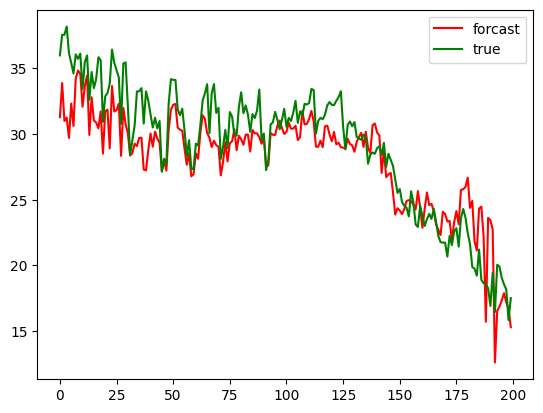

In [52]:
xgb_model = XGBRegressor(
        n_estimators=700,
        random_state=42,
        early_stopping_rounds=50,
        learning_rate=0.01,
        eval_metric='mae'  # Specify the evaluation metric
    )
    
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Test data
    verbose=100
)

# Test Perfromance
y_test_preds = xgb_model.predict(X_test)
# MAE / MAPE on Test
y_test_true = y_test.values
print(f"MAE on Test: {np.mean(np.abs(y_test_true - y_test_preds))}")
print(f"MAPE on Test: {np.mean(np.abs((y_test_true - y_test_preds) / y_test_true)) * 100}") 

plt.plot(y_test_preds[:200], c='red', label='forcast')
plt.plot(y_test_true[:200], c='green', label='true')
plt.legend()
plt.show()

In [53]:
feature_importances_df = pd.DataFrame({"feature_name" : xgb_model.feature_names_in_, "feature_importance" : xgb_model.feature_importances_})
feature_importances_df = feature_importances_df.sort_values(by='feature_importance', ascending=False)
feature_importances_df

,feature_name,feature_importance
7,meantemp_lag_1year,0.669842
8,meantemp_lag_2year,0.169323
6,year,0.036188
0,humidity,0.032806
5,month,0.028403
4,quarter,0.023299
9,humidity_lag_1year,0.010108
10,humidity_lag_2year,0.006425
2,day,0.006208
12,wind_speed_lag_2year,0.005254


<Axes: xlabel='feature_importance', ylabel='feature_name'>

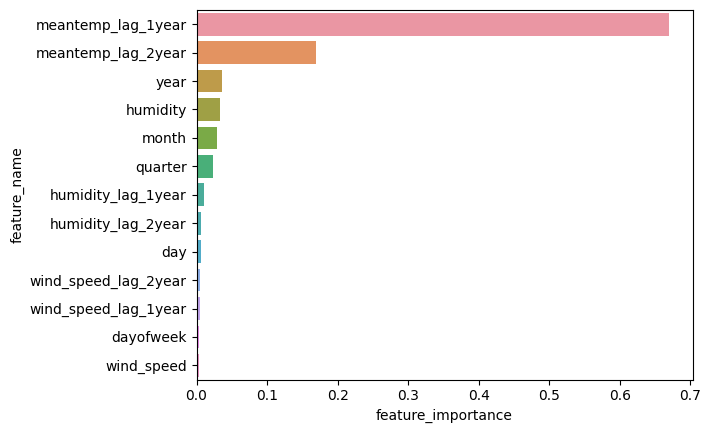

In [54]:
sns.barplot(y=feature_importances_df['feature_name'], x=feature_importances_df['feature_importance'])

#### Daily XGBoost:

In [55]:
dff = create_dummy_var(df.drop("meanpressure", axis=1)).copy()
dff = create_lag_features_daily(dff, 'meantemp')
dff = create_lag_features_daily(dff, 'humidity')
dff = create_lag_features_daily(dff, 'wind_speed')
dff.dropna(inplace=True)

# train / test split
train_df = dff[:'2016-05-31']
test_df = dff['2016-06-01':]

train_df.dropna(inplace=True)
X_train = train_df.drop('meantemp', axis=1)
y_train = train_df["meantemp"]

X_test = test_df.drop('meantemp', axis=1)
y_test = test_df["meantemp"]

# simple model
xgb_model = XGBRegressor(n_estimators=1000, random_state=42, early_stopping_rounds=50, learning_rate=0.01)
# see its performance
from sklearn.model_selection import TimeSeriesSplit

train_mae_list = []
valid_mae_list = []

tss = TimeSeriesSplit(n_splits=5, test_size=90, gap=1)
for train_idx, valid_idx in tss.split(train_df):
    # Split data into training and validation sets
    X_train_cross_val = train_df.iloc[train_idx].drop('meantemp', axis=1).reset_index(drop=True)
    y_train_cross_val = train_df.iloc[train_idx]['meantemp'].values
    X_val_cross_val = train_df.iloc[valid_idx].drop('meantemp', axis=1).reset_index(drop=True)
    y_val_cross_val = train_df.iloc[valid_idx]['meantemp'].values 
    
    # Define and fit the XGBoost model
    xgb_model = XGBRegressor(
        n_estimators=2000,
        random_state=42,
        early_stopping_rounds=20,
        learning_rate=0.01,
        eval_metric='mae'  # Specify the evaluation metric
    )
    
    xgb_model.fit(
        X_train_cross_val, 
        y_train_cross_val, 
        eval_set=[(X_train_cross_val, y_train_cross_val), (X_val_cross_val, y_val_cross_val)],  # Validation data
        verbose=100
    )

    # Make predictions for training and validation sets
    y_train_pred = xgb_model.predict(X_train_cross_val)
    y_val_pred = xgb_model.predict(X_val_cross_val)
    
    # Compute MAE for training and validation sets
    train_mae = mean_absolute_error(y_train_cross_val, y_train_pred)
    valid_mae = mean_absolute_error(y_val_cross_val, y_val_pred)
    
    # Store the MAE values
    train_mae_list.append(train_mae)
    valid_mae_list.append(valid_mae)

# Calculate the average MAE across all folds
avg_train_mae = np.mean(train_mae_list)
avg_valid_mae = np.mean(valid_mae_list)

# Print the average MAE
print(f"Average Training MAE: {avg_train_mae}")
print(f"Average Validation MAE: {avg_valid_mae}")

[0]	validation_0-mae:6.67068	validation_1-mae:5.69749
[100]	validation_0-mae:2.56701	validation_1-mae:2.48833


<ipython-input-55-a6aca6edf078>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[200]	validation_0-mae:1.09092	validation_1-mae:1.62723
[300]	validation_0-mae:0.59833	validation_1-mae:1.43339
[400]	validation_0-mae:0.41483	validation_1-mae:1.34739
[500]	validation_0-mae:0.31693	validation_1-mae:1.31911
[528]	validation_0-mae:0.30002	validation_1-mae:1.31826
[0]	validation_0-mae:6.51297	validation_1-mae:6.45417
[100]	validation_0-mae:2.52821	validation_1-mae:2.73265
[200]	validation_0-mae:1.10236	validation_1-mae:1.55459
[300]	validation_0-mae:0.62134	validation_1-mae:1.22056
[400]	validation_0-mae:0.43161	validation_1-mae:1.11615
[500]	validation_0-mae:0.34022	validation_1-mae:1.07929
[600]	validation_0-mae:0.28141	validation_1-mae:1.06201
[700]	validation_0-mae:0.24064	validation_1-mae:1.05304
[800]	validation_0-mae:0.21296	validation_1-mae:1.04873
[830]	validation_0-mae:0.20644	validation_1-mae:1.04851
[0]	validation_0-mae:6.40765	validation_1-mae:4.09595
[100]	validation_0-mae:2.48848	validation_1-mae:1.40469
[200]	validation_0-mae:1.09039	validation_1-mae:0.92

[0]	validation_0-mae:6.40910	validation_1-mae:5.93191
[100]	validation_0-mae:2.48280	validation_1-mae:2.59264
[200]	validation_0-mae:1.10513	validation_1-mae:1.47939
[300]	validation_0-mae:0.66894	validation_1-mae:1.14091
[400]	validation_0-mae:0.49927	validation_1-mae:1.03183
[500]	validation_0-mae:0.41309	validation_1-mae:0.98837
[600]	validation_0-mae:0.35122	validation_1-mae:0.97388
[699]	validation_0-mae:0.30633	validation_1-mae:0.96055
MAE on Test: 0.9605537418145345
MAPE on Test: 3.7091914375601878


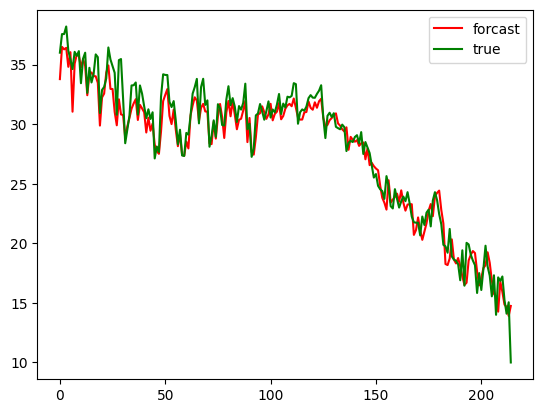

In [56]:
xgb_model = XGBRegressor(
        n_estimators=700,
        random_state=42,
        early_stopping_rounds=50,
        learning_rate=0.01,
        eval_metric='mae'  # Specify the evaluation metric
    )
    
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],  # Test data
    verbose=100
)

# Test Perfromance
y_test_preds = xgb_model.predict(X_test)
# MAE / MAPE on Test
y_test_true = y_test.values
print(f"MAE on Test: {np.mean(np.abs(y_test_true - y_test_preds))}")
print(f"MAPE on Test: {np.mean(np.abs((y_test_true - y_test_preds) / y_test_true)) * 100}") 

plt.plot(y_test_preds, c='red', label='forcast')
plt.plot(y_test_true, c='green', label='true')
plt.legend()
plt.show()

In [57]:
feature_importances_df = pd.DataFrame({"feature_name" : xgb_model.feature_names_in_, "feature_importance" : xgb_model.feature_importances_})
feature_importances_df = feature_importances_df.sort_values(by='feature_importance', ascending=False)
feature_importances_df

,feature_name,feature_importance
7,meantemp_lag_1day,0.868502
9,meantemp_lag_3day,0.047126
8,meantemp_lag_2day,0.036445
0,humidity,0.008683
4,quarter,0.006677
5,month,0.005623
10,humidity_lag_1day,0.004774
11,humidity_lag_2day,0.003348
12,humidity_lag_3day,0.003219
13,wind_speed_lag_1day,0.002921


<Axes: xlabel='feature_importance', ylabel='feature_name'>

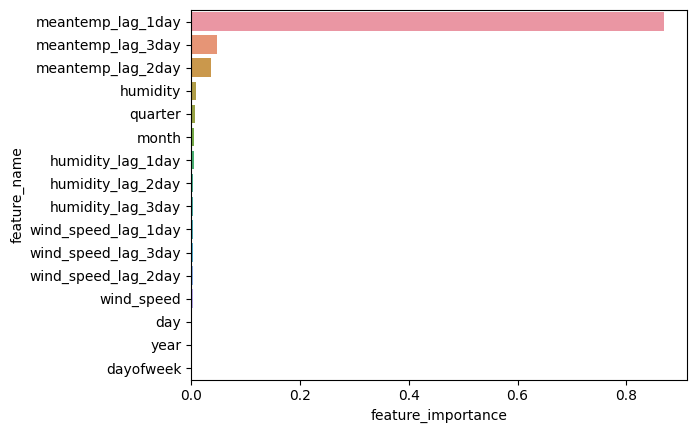

In [58]:
sns.barplot(y=feature_importances_df['feature_name'], x=feature_importances_df['feature_importance'])

#### Predict on the future:

We will use XGBoost as it's best Model
* Naive Forecasting: Yearly (9.33% [2.45]), Naive aily: (4.7[1.2])
* Statstical SARIMA & VAR: Yearly (8.32% [2.16]), Daily (4.7% [1.209])
* FB_prophit: Yearly (5.96% [1.57]), Daily (4.62% [1.16])
* XGBoost: Yearly (6.84% [1.83]), Daily (3.42% [0.88])

In [59]:
all_data = df.copy().drop("meanpressure", axis=1)
all_data

,date,meantemp,humidity,wind_speed
0,2013-01-01,10.000000,84.500000,0.000000
1,2013-01-02,7.400000,92.000000,2.980000
2,2013-01-03,7.166667,87.000000,4.633333
3,2013-01-04,8.666667,71.333333,1.233333
4,2013-01-05,6.000000,86.833333,3.700000
...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826
1458,2016-12-29,15.238095,87.857143,6.000000
1459,2016-12-30,14.095238,89.666667,6.266667
1460,2016-12-31,15.052632,87.000000,7.325000


In [60]:
future_df = pd.date_range(start='2017-01-01', end="2017-04-24", freq='1d')
future_df = pd.DataFrame(future_df, columns=['date'])
future_df['meantemp'] = np.nan
future_csv = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv")
future_df['humidity'] = future_csv['humidity']
future_df['wind_speed'] = future_csv['wind_speed']
future_df['is_future'] = True

# old df
all_data['is_future'] = False
result_df = pd.concat([all_data, future_df], axis=0)
result_df = create_dummy_var(result_df).copy()
result_df = create_lag_features_yearly(result_df, 'meantemp')
result_df = create_lag_features_yearly(result_df, 'wind_speed')
result_df = create_lag_features_yearly(result_df, 'humidity')

train_df = result_df[result_df['is_future'] == False].drop('is_future', axis=1).copy()
future_df = result_df[result_df['is_future'] == True].drop('is_future', axis=1).copy()
y = train_df['meantemp'].values
X = train_df.drop('meantemp', axis=1).reset_index(drop=True)
future_X = future_df.drop('meantemp', axis=1).reset_index(drop=True)
future_X

,humidity,wind_speed,day,dayofweek,quarter,month,year,meantemp_lag_1year,meantemp_lag_2year,wind_speed_lag_1year,wind_speed_lag_2year,humidity_lag_1year,humidity_lag_2year
0,85.869565,2.743478,1,6,1,1,2017,14.375000,14.125,5.112500,9.5125,74.750000,78.750
1,77.222222,2.894444,2,0,1,1,2017,15.750000,14.000,0.000000,15.0500,77.125000,69.375
2,81.888889,4.016667,3,1,1,1,2017,15.833333,12.000,0.616667,4.4000,88.833333,79.875
3,70.050000,4.545000,4,2,1,1,2017,17.375000,9.625,2.312500,3.9375,81.625000,86.000
4,74.944444,3.300000,5,3,1,1,2017,17.125000,10.000,0.000000,3.4875,87.000000,87.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,27.500000,5.562500,20,3,2,4,2017,34.000000,30.750,15.750000,8.1000,24.666667,33.000
110,39.375000,6.962500,21,4,2,4,2017,33.250000,31.125,8.350000,2.5500,24.250000,39.500
111,40.900000,8.890000,22,5,2,4,2017,31.916667,30.500,19.653846,12.9750,21.818182,43.125
112,27.500000,9.962500,23,6,2,4,2017,31.312500,28.750,10.187500,15.7375,22.125000,51.125


In [61]:
# Predicting in future
xgb_model = XGBRegressor(
        n_estimators=700,
        random_state=42,
        early_stopping_rounds=50,
        learning_rate=0.01,
        eval_metric='mae' 
    )
    
xgb_model.fit(
    X,
    y,
    eval_set=[(X, y)],
    verbose=100
)

[0]	validation_0-mae:6.30222
[100]	validation_0-mae:2.58758
[200]	validation_0-mae:1.30300
[300]	validation_0-mae:0.86726
[400]	validation_0-mae:0.68270
[500]	validation_0-mae:0.58960
[600]	validation_0-mae:0.53701
[699]	validation_0-mae:0.49976


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
y_preds = xgb_model.predict(future_X)

Text(0.5, 1.0, '114 days in past vs 114 days in future')

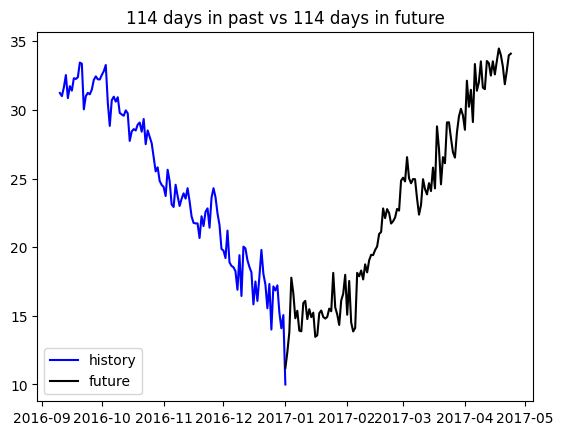

In [63]:
plt.plot(train_df.index[-114:], train_df['meantemp'][-114:], c='blue', label='history')
plt.plot(future_df.index[:114], y_preds[:114], c='black', label='future')
plt.legend()
plt.title("114 days in past vs 114 days in future")

#### 4) Deep learning (LSTM)

In [64]:
df.set_index("date", inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [65]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
df

,meantemp,humidity,wind_speed,meanpressure,Seconds
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1.356998e+09
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1.357085e+09
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1.357171e+09
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.357258e+09
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1.357344e+09
...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,1.482883e+09
2016-12-29,15.238095,87.857143,6.000000,1016.904762,1.482970e+09
2016-12-30,14.095238,89.666667,6.266667,1017.904762,1.483056e+09


In [66]:
day = 24*60*60
year = (365.2425)*day

df['Year_sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
df['Year_cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
df.drop(['meanpressure', 'Seconds'], axis=1, inplace=True)
df

,meantemp,humidity,wind_speed,Year_sin,Year_cos
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,0.009848,0.999952
2013-01-02,7.400000,92.000000,2.980000,0.027048,0.999634
2013-01-03,7.166667,87.000000,4.633333,0.044240,0.999021
2013-01-04,8.666667,71.333333,1.233333,0.061418,0.998112
2013-01-05,6.000000,86.833333,3.700000,0.078579,0.996908
...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,-0.058413,0.998292
2016-12-29,15.238095,87.857143,6.000000,-0.041232,0.999150
2016-12-30,14.095238,89.666667,6.266667,-0.024039,0.999711


In [67]:
# # Scale Data

# def df_to_X_y(df, window_size=6):
#   df_as_np = df.to_numpy()
#   X = []
#   y = []
#   for i in range(len(df_as_np) - window_size):
#     row = [r for r in df_as_np[i : i + window_size]]
#     X.append(row)
#     label = df_as_np[i + window_size][0]
#     y.append(label)
#   return np.array(X), np.array(y)
# X, y = df_to_X_y(df, window_size=3) # 7 days ago
# X.shape, y.shape
# X_train, y_train = X[:1255], y[:1255]
# X_val, y_val = X[1255:1355], y[1255:1355]
# X_test, y_test = X[1355:], y[1355:] # 100 days (nearly 3 months)
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape


# temp_training_mean = np.mean(X_train[:, :, 0])
# temp_training_std = np.std(X_train[:, :, 0])

# humidity_training_mean = np.mean(X_train[:, :, 1])
# humidity_training_std = np.std(X_train[:, :, 1])

# windspeed_training_mean = np.mean(X_train[:, :, 2])
# windspeed_training_std = np.std(X_train[:, :, 2])

# def preprocess_temp(X):
#   X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
#   return X

# def preprocess_humidity(X):
#   X[:, :, 0] = (X[:, :, 1] - humidity_training_mean) / humidity_training_std
#   return X

# def preprocess_windspeed(X):
#   X[:, :, 0] = (X[:, :, 1] - windspeed_training_mean) / windspeed_training_std
#   return X

# def preprocess_output_temp(y):
#   y = (y - temp_training_mean) / temp_training_std
#   return y

# def postprocess_temp(preds):
#   return preds * temp_training_std + temp_training_mean


#### for test comparison we should make test prediciton on next 215 days (6 months) as all models

In [68]:
# scale
wind_scaler = RobustScaler()
humitidy_scaler = StandardScaler()
target_scaler = StandardScaler()

dl_train = df.iloc[:1147]
dl_val = df.iloc[1147:1247]
dl_test = df.iloc[1247:] # 6 months accuracies

dl_train['wind_speed'] = wind_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = humitidy_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_scaler.fit_transform(dl_train[['meantemp']]) # target

dl_val['wind_speed'] = wind_scaler.transform(dl_val[['wind_speed']])
dl_val['humidity'] = humitidy_scaler.transform(dl_val[['humidity']])
dl_val['meantemp'] = target_scaler.transform(dl_val[['meantemp']])
                                                   
dl_test['wind_speed'] = wind_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = humitidy_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_scaler.transform(dl_test[['meantemp']])

<ipython-input-68-a0e12e9511cc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-a0e12e9511cc>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-a0e12e9511cc>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-a0e1

In [69]:
def df_to_X_y(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i : i + window_size]]
    X.append(row)
    label = df_as_np[i + window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [70]:
## on whole data
# X_train, y_train = X[:1147], y[:1147]
# X_val, y_val = X[1147:1247], y[1147:1247]
# X_test, y_test = X[1247:], y[1247:] # 215 days)
# X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

X_train, y_train = df_to_X_y(dl_train, window_size=14) # 14 days ago
X_val, y_val = df_to_X_y(dl_val, window_size=14) # 14 days ago
X_test, y_test = df_to_X_y(dl_test, window_size=14) # 14 days ago
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1133, 14, 5), (1133,), (86, 14, 5), (86,), (201, 14, 5), (201,))

In [71]:
# Model Architecture

lstm_model = Sequential()
lstm_model.add(InputLayer((14, 5)))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(8, 'relu'))
lstm_model.add(Dense(1, 'linear'))
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,649 (272.07 KB)

 Trainable params: 69,649 (272.07 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
cp1 = ModelCheckpoint('/kaggle/working/model1.keras', save_best_only=True)
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [73]:
lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.8557 - root_mean_squared_error: 0.9235 - val_loss: 1.0479 - val_root_mean_squared_error: 1.0236
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4930 - root_mean_squared_error: 0.7007 - val_loss: 0.7907 - val_root_mean_squared_error: 0.8892
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3593 - root_mean_squared_error: 0.5992 - val_loss: 0.4177 - val_root_mean_squared_error: 0.6463
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2272 - root_mean_squared_error: 0.4756 - val_loss: 0.1251 - val_root_mean_squared_error: 0.3538
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1159 - root_mean_squared_error: 0.3402 - val_loss: 0.0932 - val_root_mean_squared_error: 0.3052
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0991 - root_mean_squared_error: 0.3144 - val_loss: 0.1092 - val_root_mean_squared_error: 0.3305
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


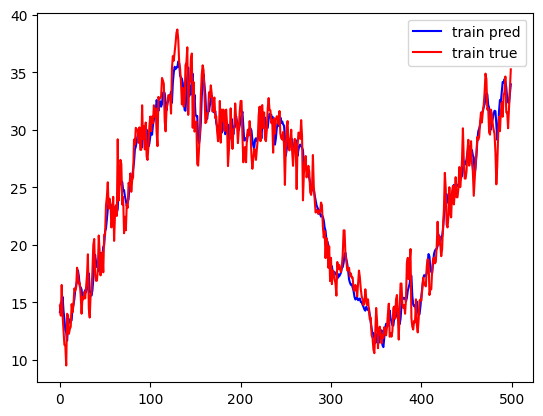

In [74]:
y_train_preds = lstm_model.predict(X_train)

plt.plot(target_scaler.inverse_transform(y_train_preds.reshape(-1, 1))[:500], c='blue', label='train pred')
plt.plot(target_scaler.inverse_transform(y_train.reshape(-1, 1))[:500], c='red', label='train true')
plt.legend()
plt.show()

In [75]:
y_train_postprocess = target_scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_preds_postprocess = target_scaler.inverse_transform(y_train_preds.reshape(-1, 1))
mean_absolute_error(y_train_postprocess, y_train_preds_postprocess)

1.1677014598265336

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


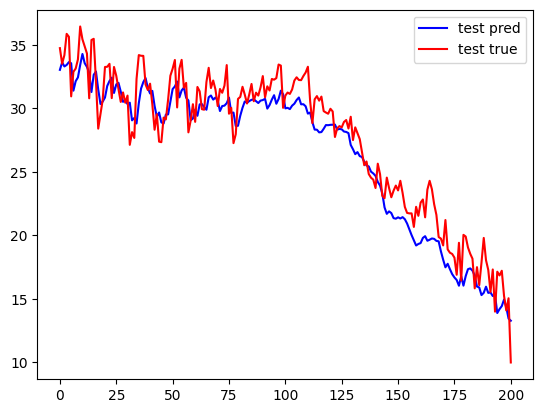

In [76]:
y_test_preds = lstm_model.predict(X_test)

plt.plot(target_scaler.inverse_transform(y_test_preds.reshape(-1, 1))[:300], c='blue', label='test pred')
plt.plot(target_scaler.inverse_transform(y_test.reshape(-1, 1))[:300], c='red', label='test true')
plt.legend()
plt.show()

In [77]:
y_test_postprocess = target_scaler.inverse_transform(y_test_preds.reshape(-1, 1))
y_test_preds_postprocess = target_scaler.inverse_transform(y_test.reshape(-1, 1))

print(f"Test MAE: {mean_absolute_error(y_test_postprocess, y_test_preds_postprocess)}")
print(f"Test MAPE: {np.mean(np.abs((y_test_postprocess - y_test_preds_postprocess) / y_test_postprocess)) * 100}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test_postprocess, y_test_preds_postprocess))}")
print(f"Test Accuracy: {r2_score(y_test_postprocess, y_test_preds_postprocess)}")

Test MAE: 1.5362624968670826
Test MAPE: 6.408018111291571
Test RMSE: 1.8407983324440897
Test Accuracy: 0.9011410733561913


#### LSTM for Multivariate

In [78]:
# scale
wind_scaler = RobustScaler()
humitidy_scaler = StandardScaler()
target_scaler = StandardScaler()

dl_train = df.iloc[:1147]
dl_val = df.iloc[1147:1247]
dl_test = df.iloc[1247:] # 6 months accuracies

dl_train['wind_speed'] = wind_scaler.fit_transform(dl_train[['wind_speed']])  # robust for wind_speed
dl_train['humidity'] = humitidy_scaler.fit_transform(dl_train[['humidity']]) # minmax for humidity
dl_train['meantemp'] = target_scaler.fit_transform(dl_train[['meantemp']]) # target

dl_val['wind_speed'] = wind_scaler.transform(dl_val[['wind_speed']])
dl_val['humidity'] = humitidy_scaler.transform(dl_val[['humidity']])
dl_val['meantemp'] = target_scaler.transform(dl_val[['meantemp']])
                                                   
dl_test['wind_speed'] = wind_scaler.transform(dl_test[['wind_speed']])
dl_test['humidity'] = humitidy_scaler.transform(dl_test[['humidity']])
dl_test['meantemp'] = target_scaler.transform(dl_test[['meantemp']])

<ipython-input-78-a0e12e9511cc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-a0e12e9511cc>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-a0e12e9511cc>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-a0e1

In [79]:
def df_to_X_y_2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i : i + window_size]]
    X.append(row)
    label = [df_as_np[i + window_size][0], df_as_np[i + window_size][1], df_as_np[i + window_size][2]]
    y.append(label)
  return np.array(X), np.array(y)

In [80]:
X_train, y_train = df_to_X_y_2(dl_train, window_size=14) # 14 days ago
X_val, y_val = df_to_X_y_2(dl_val, window_size=14) # 14 days ago
X_test, y_test = df_to_X_y_2(dl_test, window_size=14) # 14 days ago
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1133, 14, 5), (1133, 3), (86, 14, 5), (86, 3), (201, 14, 5), (201, 3))

In [81]:
# Model Architecture

lstm_model2 = Sequential()
lstm_model2.add(InputLayer((14, 5)))
lstm_model2.add(LSTM(64, return_sequences=True))
lstm_model2.add(LSTM(128))
lstm_model2.add(Dense(8, 'relu'))
lstm_model2.add(Dense(3, 'linear'))
lstm_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 14, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,795 (460.14 KB)

 Trainable params: 117,795 (460.14 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
cp2 = ModelCheckpoint('/kaggle/working/model2.keras', save_best_only=True)
lstm_model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [83]:
lstm_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp2])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7699 - root_mean_squared_error: 0.8773 - val_loss: 1.3538 - val_root_mean_squared_error: 1.1635
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5990 - root_mean_squared_error: 0.7736 - val_loss: 1.2061 - val_root_mean_squared_error: 1.0982
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5231 - root_mean_squared_error: 0.7230 - val_loss: 0.9636 - val_root_mean_squared_error: 0.9816
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4793 - root_mean_squared_error: 0.6916 - val_loss: 0.6373 - val_root_mean_squared_error: 0.7983
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3961 - root_mean_squared_error: 0.6291 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6740
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4038 - root_mean_squared_error: 0.6351 - val_loss: 0.4042 - val_root_mean_squared_error: 0.6357
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


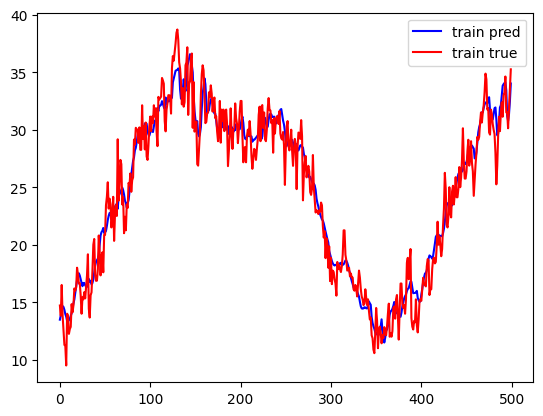

In [84]:
y_train_preds = lstm_model2.predict(X_train)

plt.plot(target_scaler.inverse_transform(y_train_preds[:, 0].reshape(-1, 1))[:500], c='blue', label='train pred')
plt.plot(target_scaler.inverse_transform(y_train[:, 0].reshape(-1, 1))[:500], c='red', label='train true')
plt.legend()
plt.show()

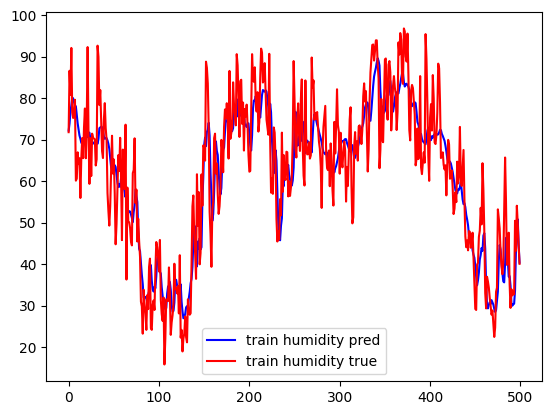

In [85]:
plt.plot(humitidy_scaler.inverse_transform(y_train_preds[:, 1].reshape(-1, 1))[:500], c='blue', label='train humidity pred')
plt.plot(humitidy_scaler.inverse_transform(y_train[:, 1].reshape(-1, 1))[:500], c='red', label='train humidity true')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


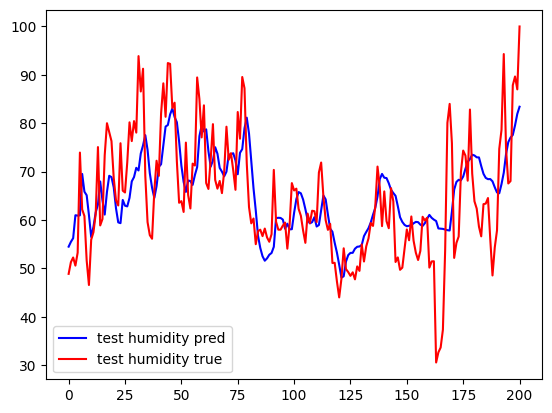

In [86]:
y_test_preds = lstm_model2.predict(X_test)

plt.plot(humitidy_scaler.inverse_transform(y_test_preds[:, 1].reshape(-1, 1))[:500], c='blue', label='test humidity pred')
plt.plot(humitidy_scaler.inverse_transform(y_test[:, 1].reshape(-1, 1))[:500], c='red', label='test humidity true')
plt.legend()
plt.show()

In [87]:
y_train_postprocess = target_scaler.inverse_transform(y_train[:, 0].reshape(-1, 1))
y_train_preds_postprocess = target_scaler.inverse_transform(y_train_preds[:, 0].reshape(-1, 1))
print(f"Train MAE: {mean_absolute_error(y_train_postprocess, y_train_preds_postprocess)}")

Train MAE: 1.286547974609383


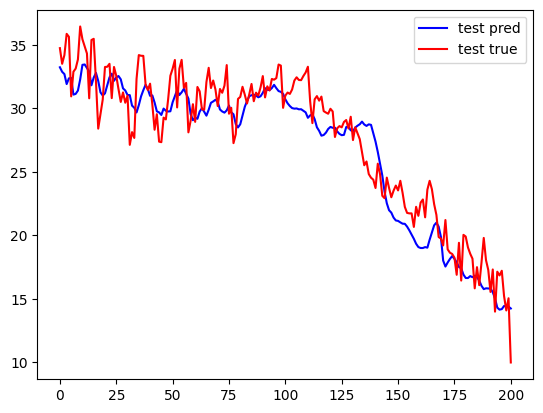

In [88]:
plt.plot(target_scaler.inverse_transform(y_test_preds[:, 0].reshape(-1, 1))[:300], c='blue', label='test pred')
plt.plot(target_scaler.inverse_transform(y_test[:, 0].reshape(-1, 1))[:300], c='red', label='test true')
plt.legend()
plt.show()

In [89]:
y_test_postprocess = target_scaler.inverse_transform(y_test_preds[:, 0].reshape(-1, 1))
y_test_preds_postprocess = target_scaler.inverse_transform(y_test[:, 0].reshape(-1, 1))

print(f"Test MAE: {mean_absolute_error(y_test_postprocess, y_test_preds_postprocess)}")
print(f"Test MAPE: {np.mean(np.abs((y_test_postprocess - y_test_preds_postprocess) / y_test_postprocess)) * 100}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test_postprocess, y_test_preds_postprocess))}")
print(f"Test Accuracy: {r2_score(y_test_postprocess, y_test_preds_postprocess)}")

Test MAE: 1.6747449796337417
Test MAPE: 6.781959850374346
Test RMSE: 2.0283445517549827
Test Accuracy: 0.8748767595788055


In [90]:
data = {
    "Model": [
        "Naive Forecasting",
        "Statistical (SARIMA, VAR)",
        "FB Prophet",
        "XGBoost",
        "LSTM"
    ],
    "Yearly MAE": [2.45, 2.16, 1.57, 1.91, None],
    "Yearly MAPE": [9.33, 8.32, 5.96, 7.25, None],
    "Daily MAE": [1.2, 1.209, 1.16, 0.96, 1.49],
    "Daily MAPE": [4.7, 4.7, 4.62, 3.7, 6.0]
}

df = pd.DataFrame(data)
df.columns = pd.MultiIndex.from_tuples([
    ("Model", ""),
    ("Yearly", "MAE"),
    ("Yearly", "MAPE (%)"),
    ("Daily", "MAE"),
    ("Daily", "MAPE (%)")
])
df

Model Yearly           Daily         
                                MAE MAPE (%)    MAE MAPE (%)
0          Naive Forecasting   2.45     9.33  1.200     4.70
1  Statistical (SARIMA, VAR)   2.16     8.32  1.209     4.70
2                 FB Prophet   1.57     5.96  1.160     4.62
3                    XGBoost   1.91     7.25  0.960     3.70
4                       LSTM    NaN      NaN  1.490     6.00

#### All Models Comaprison:

* Naive Forecasting: Yearly (9.33% [2.45]), Naive aily: (4.7[1.2])
* Statstical SARIMA & VAR: Yearly (8.32% [2.16]), Daily (4.7% [1.209])
* FB_prophit: Yearly (5.96% [1.57]), Daily (4.62% [1.16])
* **XGBoost: Yearly (7.25% [1.91]), Daily (3.7% [0.96])**
* LSTM: Daily (6% [1.49]) bcz very small dataset => so **best model is XGBoost Daily** on this dataset